# Neural Networks

Author: Athan Zhang (athanzxyt)

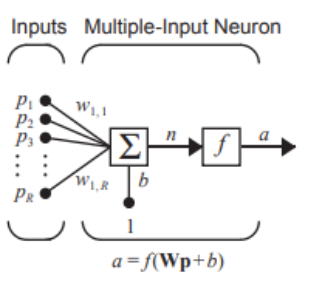

$$
a = f(\mathbf{Wx}+b)
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
np.random.seed(0)

## Randomly Generated Dataset

In [2]:
def line(x):
    return 3 * x + 2

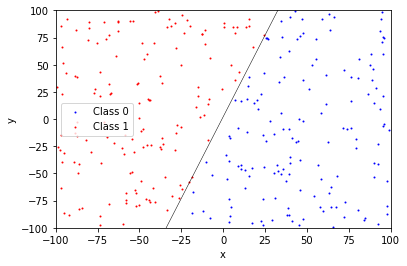

In [3]:
# Generate random points
X = np.random.uniform(low = -100, high = 100, size = (300, 2))
y = np.where(X[:, 1] > line(X[:, 0]), 1, 0)

# Give each point a class based on their location with respect to the sepearting line
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='blue', label='Class 0', s = 1)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='red', label='Class 1', s = 1)

# Generate the sepearting line
line_x = np.linspace(-100, 100, 100)
plt.plot(line_x, line(line_x), color='black', linewidth=0.5)

# Plot the data with labels and a legend
plt.xlim(-100, 100)
plt.ylim(-100, 100)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

In [17]:
class myPerceptron:
    def __init__(self):
        pass
    
    def predict(self, X):
        n = np.dot(X, self.weights) + self.bias
        return np.array([1 if elem >= 0 else 0 for elem in n])
        # return 1 / (1 + np.exp(-n))
    
    def fit(self, X, y, lr=0.01, max_epochs=200):
        n_samples, n_features = X.shape
        
        self.weights = np.zeros(n_features)
        self.bias = 0
        self.lr = lr   
        
        for epoch in range(max_epochs):
            
            # Compute the output
            out = self.predict(X)
            
            # Calculate weight deltas
            delta_W = self.lr * np.dot(X.T, (y - out))
            delta_b = np.sum(self.lr * np.sum(y - out))
            
            # Update parameters
            self.weights += delta_W
            self.bias += delta_b
            

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

pcp = myPerceptron()
pcp.fit(X_train, y_train)

preds = pcp.predict(X_test)
acc = np.sum(y_test == preds) / len(y_test) * 100

print(f"Number of misclassifications: {np.sum(y_test != preds)}")
print(f"Accuracy: {round(acc,2)}")

Number of misclassifications: 0
Accuracy: 100.0


## Iris Dataset

In [26]:
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

data = load_iris()
X, y = data.data, data.target
X = X[y != 2]
y = y[y != 2]

Number of misclassifications: 0
Accuracy: 100.0


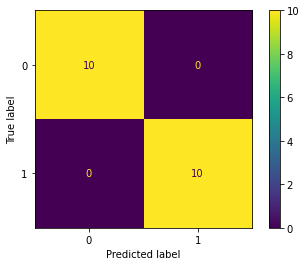

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

pcp = myPerceptron()
pcp.fit(X_train, y_train, lr=0.1, max_epochs=5000)

preds = pcp.predict(X_test)
acc = np.sum(y_test == preds) / len(y_test) * 100

print(f"Number of misclassifications: {np.sum(y_test != preds)}")
print(f"Accuracy: {round(acc,2)}")

cm = confusion_matrix(y_test, preds, labels=np.unique(y_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot()

## Sklearn Library

Accuracy: 100.0


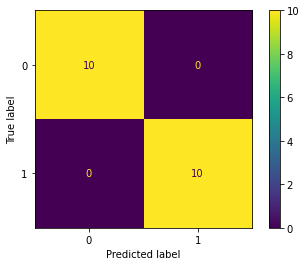

In [34]:
from sklearn.linear_model import Perceptron

pcp = Perceptron(random_state=0)
pcp.fit(X_train, y_train)

preds = pcp.predict(X_test)
acc = np.sum(y_test == preds) / len(y_test) * 100
print(f"Accuracy: {round(acc,2)}")

cm = confusion_matrix(y_test, preds, labels=np.unique(y_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot()